#Self Organizing Map

##Install MiniSom Package

In [1]:
!pip install MiniSom

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for MiniSom: filename=MiniSom-2.3.2-py3-none-any.whl size=10663 sha256=32f042dd3876e599376a8276779e39aa535d56a333ea91c658b1829162256008
  Stored in directory: c:\users\derrik\appdata\local\pip\cache\wheels\61\e8\de\cd2df73e85e467e1cf90ff918c6d6f388eff8e9029dae8bd78
Successfully built MiniSom


### Importing the libraries


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [3]:
dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values 
y = dataset.iloc[:, -1].values

## Feature Scaling


In [4]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
X = sc.fit_transform(X)

##Training the SOM


In [5]:
from minisom import MiniSom
som = MiniSom(x=10, y=10, input_len= 15, sigma= 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

##Visualizing the results


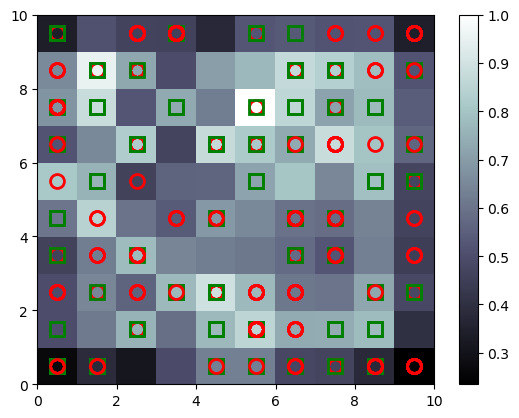

In [6]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

## Finding the frauds


In [8]:
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(1,8)], mappings[(5,7)]), axis = 0)
frauds = sc.inverse_transform(frauds)

##Printing the Fraunch Clients

In [9]:
print('Fraud Customer IDs')
for i in frauds[:, 0]:
  print(int(i))

Fraud Customer IDs
15660390
15790254
15768600
15748552
15757467
15801441
15815443
15748432
15577515
15705343
15788131
15771856
15720644
15696287
15808023
15795079
15808386
15671987
15764841
15748649
15729718
15786539
15773776
15778345
15791769
15776494
15692137
15676909
